# CodSoft Task 2 Spam or Ham Classification

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
#pip install --upgrade tensorflow

### Load the data into Pandas dataframe

In [3]:
df = pd.read_csv('D:/download/spam.csv',delimiter=',',encoding='latin-1')
df.head()
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
#df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'target', 'v2':'spam_ham'}, inplace= True)
df.head()

,target,spam_ham,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Text(0.5, 1.0, 'Num of hum spam')

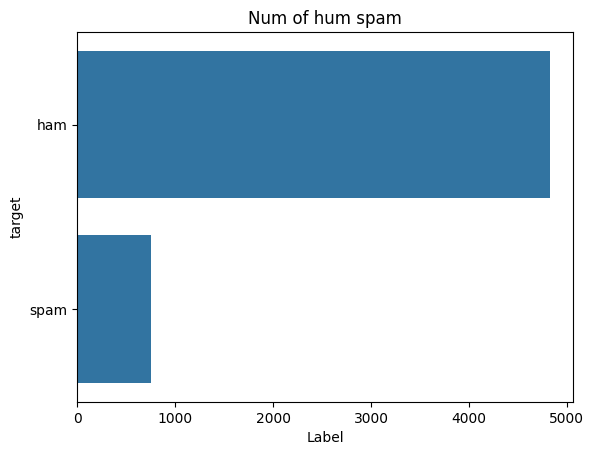

In [5]:
sns.countplot(df.target)
plt.xlabel('Label')
plt.title('Num of hum spam')

In [6]:
X = df.spam_ham
#Y = df.target
#le = LabelEncoder()
#Y = le.fit_transform(Y)
#Y = Y.reshape(-1,1)
Y=df['target'].map({'spam':'1', 'ham':'0'})
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: object


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Process the data

In [8]:
import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences  # Use 'pad_sequences' from 'keras.preprocessing.sequence'

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)  # Use 'pad_sequences' from 'keras.preprocessing.sequence'


### RNN

In [9]:
# Convert string labels to integers (if necessary)
Y_train = Y_train.astype(int)

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    #layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [10]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0     

In [11]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 11s 207ms/step - loss: 0.3401 - accuracy: 0.8687 - val_loss: 0.1431 - val_accuracy: 0.9596
Epoch 2/10
28/28 [==============================] - 5s 162ms/step - loss: 0.0908 - accuracy: 0.9767 - val_loss: 0.0476 - val_accuracy: 0.9888


Give accuracy of 97% on traning data and 98% on validation data

In [12]:
from keras_preprocessing.sequence import pad_sequences
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

Evaluating model on test set.

In [13]:
Y_test=Y_test.astype(int)
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 1s 26ms/step - loss: 0.0530 - accuracy: 0.9874


In [14]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.053
  Accuracy: 0.987
